# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
The glossary for some of the column meanings can be found [here](https://climate.weather.gc.ca/glossary_e.html)

In [3]:
df = pd.read_csv('fires-weather.csv')

C:\Users\ethan\AppData\Local\Temp\ipykernel_11020\828109130.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fires-weather.csv')


In [4]:
df

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,51.1450,-127.50073,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,1,49.2971,-122.2321,2000-08-21,0.20,PITT LAKE,BC,49.2600,-122.31000,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,55.8000,-124.8167,2005-06-20,0.01,MESILINKA CAMP,BC,56.0700,-124.30000,803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49.8770,-121.5730,2000-08-06,0.10,LYTTON A,BC,50.1328,-121.34550,224.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,49.0667,-121.8333,2000-07-28,0.10,VEDDER SOUTH LICKMAN,BC,49.0600,-122.00000,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148758,148756,65.0282,-141.2460,2024-05-15,0.00,CLINTON CREEK,YT,64.2800,-140.44000,576.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148759,148757,55.9370,-121.9170,2024-05-12,295.00,HUDSON HOPE BCHPA DAM,BC,56.0100,-122.12000,678.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148760,148758,60.2150,-112.8720,2024-04-26,0.10,BEAR TOWER,NT,60.3100,-113.14000,213.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148761,148759,60.1950,-112.7960,2024-04-26,0.10,BEAR TOWER,NT,60.3100,-113.14000,213.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns have mixed types

In [5]:
# Function to check mixed types in columns, returns a dictionary where keys are column names, values are lists of types
def check_mixed_types(df):
    mixed_type_columns = {}
    for column in df.columns:
        types = df[column].map(type).unique()
        if len(types) > 1:
            mixed_type_columns[column] = types
    return mixed_type_columns

In [6]:
mixed_types = check_mixed_types(df)

for k, v in mixed_types.items():
    print(k, v)

PROVINCE_CODE [<class 'str'> <class 'float'>]
TOTAL_SNOW_FLAG [<class 'float'> <class 'str'>]
DIRECTION_MAX_GUST_FLAG [<class 'float'> <class 'str'>]
ID [<class 'str'> <class 'float'>]
MIN_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
MAX_REL_HUMIDITY_FLAG [<class 'float'> <class 'str'>]
LOCAL_DATE [<class 'str'> <class 'float'>]
COOLING_DEGREE_DAYS_FLAG [<class 'float'> <class 'str'>]
SNOW_ON_GROUND_FLAG [<class 'float'> <class 'str'>]
MEAN_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
MAX_TEMPERATURE_FLAG [<class 'float'> <class 'str'>]
TOTAL_PRECIPITATION_FLAG [<class 'float'> <class 'str'>]
SPEED_MAX_GUST_FLAG [<class 'float'> <class 'str'>]
MIN_REL_HUMIDITY_FLAG [<class 'float'> <class 'str'>]
TOTAL_RAIN_FLAG [<class 'float'> <class 'str'>]
HEATING_DEGREE_DAYS_FLAG [<class 'float'> <class 'str'>]
CLIMATE_IDENTIFIER [<class 'str'> <class 'float'>]


In [7]:
# Check PROVINCE_CODE
value_provinces = df['PROVINCE_CODE']
value_str_provinces = value_provinces.apply(lambda x: isinstance(x, str))

In [8]:
province_mix = pd.concat([value_provinces, value_str_provinces], axis=1)
province_mix.columns = ['PROVINCE_CODE', 'IS_STR']
province_mix

,PROVINCE_CODE,IS_STR
0,BC,True
1,NaN,False
2,NaN,False
3,NaN,False
4,NaN,False
...,...,...
148758,NaN,False
148759,NaN,False
148760,NaN,False
148761,NaN,False


Conclusion: `NaN` values are treated as floats, which are not strings -> Must force type conversion

In [9]:
types = {
    'PROVINCE_CODE': 'str',
    'TOTAL_SNOW_FLAG': 'str',
    'DIRECTION_MAX_GUST_FLAG': 'str',
    'ID': 'str',
    'MIN_TEMPERATURE_FLAG': 'str',
    'MAX_TEMPERATURE_FLAG': 'str',
    'LOCAL_DATE': 'str',
    'COOLING_DEGREE_DAYS_FLAG': 'str',
    'SNOW_ON_GROUND_FLAG': 'str',
    'MEAN_TEMPERATURE_FLAG': 'str',
    'TOTAL_PRECIPITATION_FLAG': 'str',
}

In [10]:
df = pd.read_csv('fires-weather.csv', dtype=types)

## Duplicates
Checking for duplicate `ID`s because merging caused miss-indexing

In [11]:
# Check for duplicate fire_id because indexing is wrong in the file
duplicates = df[df['fire_id'].duplicated(keep=False)]
duplicates

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
32682,32682,53.5645,-123.940,2018-06-23,144.1,MAPES,BC,53.53,-123.53,784.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32683,32682,53.5645,-123.940,2018-06-23,144.1,FORT FRASER 13S,BC,53.53,-124.35,701.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145995,145994,48.2770,-80.545,2023-06-23,1.9,CONNAUGHT,ON,48.37,-80.55,281.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145996,145994,48.2770,-80.545,2023-06-23,1.9,CONNAUGHT,ON,48.37,-80.54,281.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop duplicates
df = df.drop_duplicates(subset='fire_id')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148761 entries, 0 to 148762
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fire_id                   148761 non-null  int64  
 1   lat                       148761 non-null  float64
 2   lon                       148761 non-null  float64
 3   date                      148761 non-null  object 
 4   hectares                  148761 non-null  float64
 5   STATION_NAME              148761 non-null  object 
 6   PROV_STATE_TERR_CODE      148761 non-null  object 
 7   LATITUDE                  148761 non-null  float64
 8   LONGITUDE                 148761 non-null  float64
 9   ELEVATION                 146037 non-null  float64
 10  distance                  148761 non-null  float64
 11  PROVINCE_CODE             35958 non-null   object 
 12  HEATING_DEGREE_DAYS       31956 non-null   float64
 13  TOTAL_SNOW_FLAG           7719 non-null    object

In [14]:
df.head()

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,51.1450,-127.50073,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,1,49.2971,-122.2321,2000-08-21,0.20,PITT LAKE,BC,49.2600,-122.31000,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,55.8000,-124.8167,2005-06-20,0.01,MESILINKA CAMP,BC,56.0700,-124.30000,803.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,49.8770,-121.5730,2000-08-06,0.10,LYTTON A,BC,50.1328,-121.34550,224.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,49.0667,-121.8333,2000-07-28,0.10,VEDDER SOUTH LICKMAN,BC,49.0600,-122.00000,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.describe()

,fire_id,lat,lon,hectares,LATITUDE,LONGITUDE,ELEVATION,distance,HEATING_DEGREE_DAYS,DIRECTION_MAX_GUST,...,TOTAL_SNOW,MEAN_TEMPERATURE,SPEED_MAX_GUST,MIN_REL_HUMIDITY,COOLING_DEGREE_DAYS,MAX_TEMPERATURE,LOCAL_YEAR,TOTAL_RAIN,TOTAL_PRECIPITATION,SNOW_ON_GROUND
count,148761.000000,148761.000000,148761.000000,1.487610e+05,148761.000000,148761.000000,146037.000000,148761.000000,31956.000000,10800.00000,...,23220.000000,31956.000000,10839.000000,7868.000000,31956.000000,33675.000000,35958.000000,23018.000000,32290.000000,20168.000000
mean,74380.000000,52.032307,-102.520121,4.641035e+02,52.008772,-102.518765,533.722164,24.676222,3.947835,14.12787,...,0.030177,15.153085,28.035335,38.224962,1.100920,22.310218,2008.928305,1.933739,1.847290,0.400352
std,42943.746035,4.754563,20.945083,7.872712e+03,4.755300,20.902612,418.085939,39.763070,5.152374,12.93195,...,0.565366,6.253920,22.567243,15.494066,1.967685,6.921212,6.554949,5.041713,4.988779,5.295837
min,0.000000,0.000000,-166.044000,0.000000e+00,0.000000,-141.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,-44.800000,0.000000,8.000000,0.000000,-42.700000,2000.000000,0.000000,0.000000,0.000000
25%,37190.000000,49.101900,-118.704167,1.000000e-02,49.130000,-118.550000,245.000000,10.530787,0.000000,0.00000,...,0.000000,11.500000,0.000000,27.000000,0.000000,18.400000,2004.000000,0.000000,0.000000,0.000000
50%,74380.000000,51.332000,-112.104017,1.000000e-01,51.265700,-112.130000,420.600000,19.641312,1.700000,15.00000,...,0.000000,16.300000,35.000000,36.000000,0.000000,23.300000,2007.000000,0.000000,0.000000,0.000000
75%,111570.000000,55.153550,-84.693700,1.000000e+00,55.180000,-84.480000,731.500000,31.307892,6.500000,26.00000,...,0.000000,19.500000,44.000000,47.000000,1.500000,27.000000,2014.000000,1.400000,1.200000,0.000000
max,148760.000000,69.602500,116.188000,1.080520e+06,82.310400,0.000000,2926.100000,5679.881861,62.800000,36.00000,...,37.000000,31.800000,128.000000,100.000000,13.800000,45.500000,2024.000000,168.000000,168.000000,254.000000


## Explore missing data
In this section, we would like to explore missing data. It is often the case that certain climate stations do not offer climate data for the day we are looking for. Every weather data entry contains a column `ID`, but there may be missing other climate entries such as temperature. If a wildfire does not have an associated `ID`, it is because there is simply not any weather data entry at all at that date at that specific climate station

In [16]:
missing_id = df['ID'].isnull().sum()
missing_percent = missing_id / len(df) * 100

In [17]:
missing_percent

np.float64(75.82834210579385)

We can see that around $\frac{3}{4}$ of wildfires do not have corresponding weather data entries. Since we have over 140000 entries, we will drop all wildfires with no data

In [18]:
df = df.dropna(subset=['ID'])

In [19]:
# Save wildfires with weather data to file
df.to_csv('2000-2021+2023-2024-fire-weather.csv', index=False)

Read wildfire dataset without missing weather data

In [21]:
df = pd.read_csv('2000-2021+2023-2024-fire-weather.csv')

In [22]:
len(df)

35958

We are still left with 36000 wildfires to explore. However, even amongst the entries that do have climate data, there are many columns that are missing. Some stations do not offer climate data

In [23]:
df

,fire_id,lat,lon,date,hectares,STATION_NAME,PROV_STATE_TERR_CODE,LATITUDE,LONGITUDE,ELEVATION,...,TOTAL_PRECIPITATION_FLAG,SPEED_MAX_GUST_FLAG,LOCAL_YEAR,TOTAL_RAIN,MIN_REL_HUMIDITY_FLAG,TOTAL_RAIN_FLAG,HEATING_DEGREE_DAYS_FLAG,TOTAL_PRECIPITATION,SNOW_ON_GROUND,CLIMATE_IDENTIFIER
0,0,50.9050,-126.9292,2000-03-10,6.00,EGG ISLAND,BC,51.145000,-127.500730,14.0,...,NaN,NaN,2000.0,3.5,NaN,NaN,NaN,3.5,0.0,1062646
1,11,59.9617,-121.3608,2000-06-27,1000.00,SAMBAA K'E,NT,60.262700,-121.142000,498.0,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,0.0,220CQHR
2,12,59.9752,-121.0342,2000-07-11,12.00,SAMBAA K'E,NT,60.262700,-121.142000,498.0,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,0.0,220CQHR
3,13,59.1767,-122.0190,2001-06-13,5.00,FORT NELSON UA,BC,58.502900,-122.342207,378.3,...,T,NaN,2001.0,0.0,NaN,T,NaN,0.0,0.0,1192950
4,24,59.4008,-120.6438,2000-06-26,0.10,PETITOT LO,AB,59.320000,-119.370000,777.2,...,NaN,NaN,2000.0,1.2,NaN,NaN,NaN,1.2,0.0,3075171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35953,148730,55.8120,-108.9650,2024-07-12,0.10,BUFFALO NARROWS A,SK,55.520000,-108.290000,421.2,...,NaN,NaN,2024.0,NaN,NaN,NaN,NaN,0.0,NaN,4060988
35954,148741,42.4775,-122.6030,2024-07-07,1652.81,RACE ROCKS,BC,48.175274,-123.315319,7.4,...,NaN,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,1016640
35955,148747,66.8992,-141.3160,2024-06-29,2512.57,OLD CROW A,YT,67.341200,-139.502400,250.2,...,M,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,2100807
35956,148750,66.1294,-141.0790,2024-06-19,21266.30,OLD CROW A,YT,67.341200,-139.502400,250.2,...,M,NaN,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,2100807


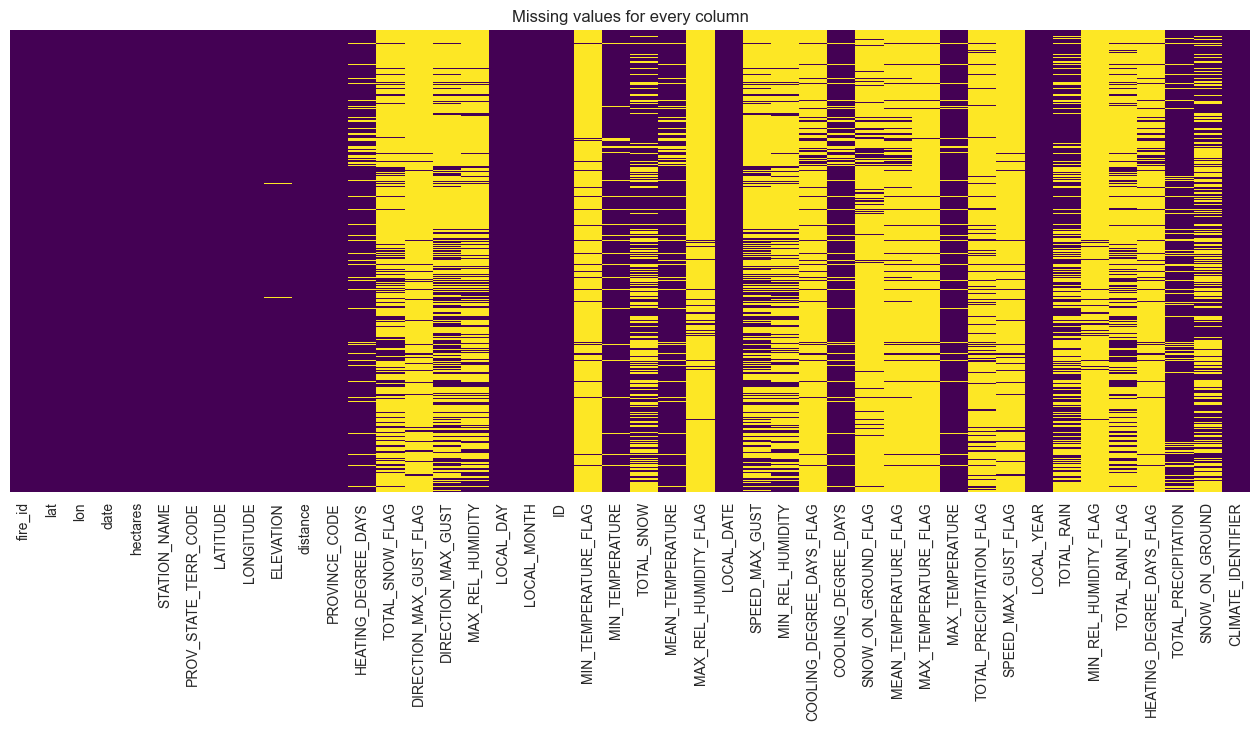

In [24]:
# Heatmap of missing values
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing values for every column')
plt.show()

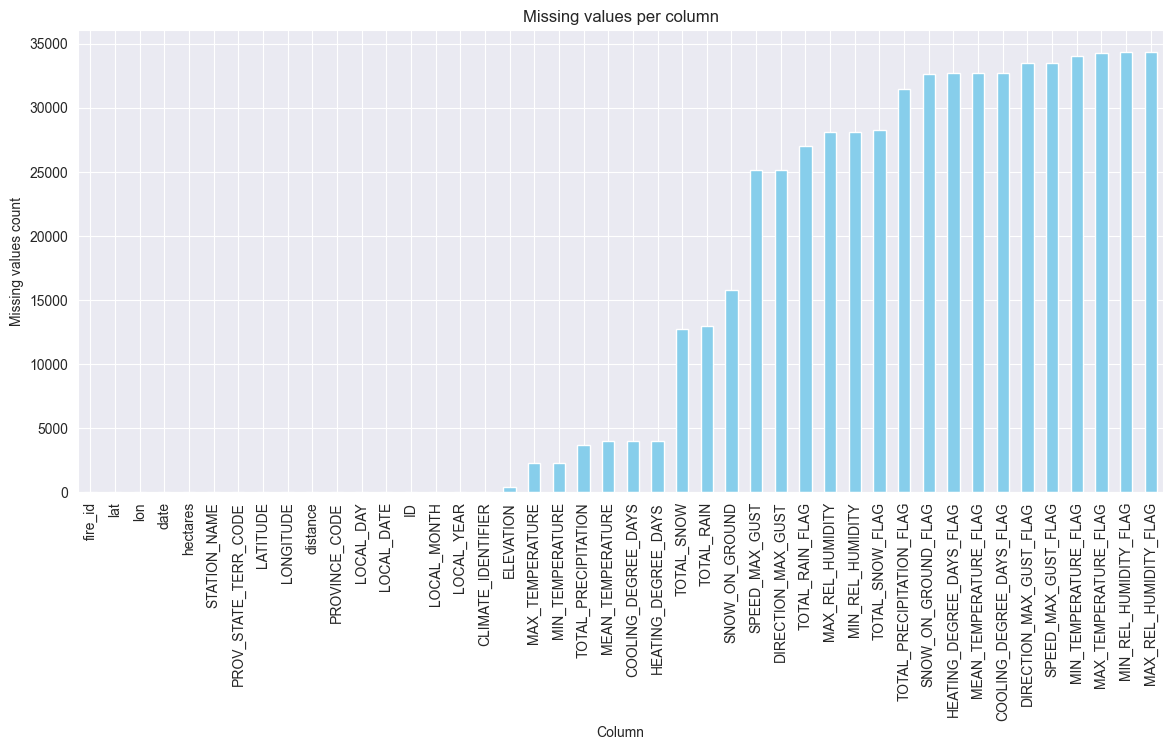

In [25]:
# Bar plot of missing values
missing_values = df.isnull().sum().sort_values(ascending=True)
missing_values.plot(kind='bar', color='skyblue', figsize=(14, 6))
plt.title('Missing values per column')
plt.xlabel('Column')
plt.ylabel('Missing values count')
plt.show()

In [31]:
missing_values = df.isnull().sum()
missing_percentage = missing_values / len(df) * 100
missing_percentage_df = pd.DataFrame({
    'missing_percentage': missing_percentage,
    'missing-values': missing_values
})
missing_percentage_df.sort_values('missing_percentage', ascending=False, inplace=True)

In [32]:
missing_percentage_df

,missing_percentage,missing-values
MAX_REL_HUMIDITY_FLAG,95.500306,34340
MIN_REL_HUMIDITY_FLAG,95.486401,34335
MAX_TEMPERATURE_FLAG,95.319539,34275
MIN_TEMPERATURE_FLAG,94.702153,34053
SPEED_MAX_GUST_FLAG,93.128094,33487
DIRECTION_MAX_GUST_FLAG,93.039101,33455
HEATING_DEGREE_DAYS_FLAG,90.944991,32702
COOLING_DEGREE_DAYS_FLAG,90.944991,32702
MEAN_TEMPERATURE_FLAG,90.944991,32702
SNOW_ON_GROUND_FLAG,90.666889,32602


Columns with the highest percentage of NaN values are ones with `FLAG`, which is normal because a flag is only present under a specific condition

Certain features that we care about are also missing in large quantities: Snow (44%), max/min humidity (78%), total rain (36%), total precipitation (10%), total snow (36%), speed of max gust (70%), direction of max gust (70%), max/min temperature (6%), mean temperature (11%)

In [28]:
df.describe()

,fire_id,lat,lon,hectares,LATITUDE,LONGITUDE,ELEVATION,distance,HEATING_DEGREE_DAYS,DIRECTION_MAX_GUST,...,TOTAL_SNOW,MEAN_TEMPERATURE,SPEED_MAX_GUST,MIN_REL_HUMIDITY,COOLING_DEGREE_DAYS,MAX_TEMPERATURE,LOCAL_YEAR,TOTAL_RAIN,TOTAL_PRECIPITATION,SNOW_ON_GROUND
count,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35958.000000,35590.000000,35958.000000,31956.000000,10800.00000,...,23220.000000,31956.000000,10839.000000,7868.000000,31956.000000,33675.000000,35958.000000,23018.000000,32290.000000,20168.000000
mean,74906.867651,52.615661,-102.800983,454.385722,52.596659,-102.830792,524.857640,26.834704,3.947835,14.12787,...,0.030177,15.153085,28.035335,38.224962,1.100920,22.310218,2008.928305,1.933739,1.847290,0.400352
std,41049.465252,4.645770,20.332078,7035.556905,4.659605,20.160608,407.464101,70.605568,5.152374,12.93195,...,0.565366,6.253920,22.567243,15.494066,1.967685,6.921212,6.554949,5.041713,4.988779,5.295837
min,0.000000,40.065300,-162.480000,0.000000,42.020000,-140.520800,1.200000,0.121434,0.000000,0.00000,...,0.000000,-44.800000,0.000000,8.000000,0.000000,-42.700000,2000.000000,0.000000,0.000000,0.000000
25%,40907.750000,49.399100,-117.674650,0.010000,49.402200,-117.480000,242.000000,10.461069,0.000000,0.00000,...,0.000000,11.500000,0.000000,27.000000,0.000000,18.400000,2004.000000,0.000000,0.000000,0.000000
50%,72077.500000,52.108400,-111.903362,0.100000,52.100000,-112.012500,428.200000,19.690455,1.700000,15.00000,...,0.000000,16.300000,35.000000,36.000000,0.000000,23.300000,2007.000000,0.000000,0.000000,0.000000
75%,109512.750000,55.799287,-88.401310,1.100000,55.520000,-88.195600,716.300000,32.470761,6.500000,26.00000,...,0.000000,19.500000,44.000000,47.000000,1.500000,27.000000,2014.000000,1.400000,1.200000,0.000000
max,148755.000000,69.572000,116.188000,577646.800000,82.310400,-52.490100,2926.100000,5679.881861,62.800000,36.00000,...,37.000000,31.800000,128.000000,100.000000,13.800000,45.500000,2024.000000,168.000000,168.000000,254.000000


## Imputing data
For `TOTAL_RAIN`, `TOTAL_PRECIPITATION`, `SNOW_ON_GROUND`, and `TOTAL_SNOW`, we will fill `NaN` values with 0 because `NaN` in these columns mean there is no snow/rain

In [33]:
zero_columns = ['TOTAL_RAIN', 'TOTAL_PRECIPITATION', 'SNOW_ON_GROUND', 'TOTAL_SNOW']
df[zero_columns] = df[zero_columns].fillna(0)

We impute missing values `MEAN_TEMPERATURE`, `MIN_TEMPERATURE`, `MAX_TEMPERATURE` using mean. 